## 1. Загрузка данных

**Чтение данных, преобразование даты, добавление столбца "Цена"**

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


data = pd.read_excel('dataset.xlsx')

# Добавляем столбец с ценой
data['Цена'] = data['Сумма'] / data['Количество']

# Преобразование даты в числовой формат
data['Дата'] = pd.to_datetime(data['Дата'])

## 2. Подготовка рабочего датафрейма

In [2]:
# Группировка по SKU с добавлением суммы объема продаж по каждому SKU в день
groupby_sku = data.groupby(['SKU, Код', 'Дата'])['Количество'].sum().to_frame().reset_index()

# Группировка по SKU с добавлением средней цены для каждого дня
groupby_price = data.groupby(['SKU, Код', 'Дата'])['Цена'].mean().to_frame().reset_index()
groupby_price['Цена'] = round(groupby_price['Цена'])

# Объединение двух таблиц в одну, сортируем по дате
df = groupby_price.merge(groupby_sku, on=['SKU, Код', 'Дата'])

df.head(5)

,"SKU, Код",Дата,Цена,Количество
0,"Колбаса ""Докторская Как раньше"" 1 кг.ц/ф, РТ-0...",2022-08-01,350.0,81.465
1,"Колбаса ""Докторская Как раньше"" 1 кг.ц/ф, РТ-0...",2022-08-02,352.0,75.900
2,"Колбаса ""Докторская Как раньше"" 1 кг.ц/ф, РТ-0...",2022-08-03,351.0,75.973
3,"Колбаса ""Докторская Как раньше"" 1 кг.ц/ф, РТ-0...",2022-08-04,361.0,72.710
4,"Колбаса ""Докторская Как раньше"" 1 кг.ц/ф, РТ-0...",2022-08-05,360.0,103.315


In [3]:
# Вывод статистических показателей по Цене и Количеству
df[['Цена', 'Количество']].describe()

,Цена,Количество
count,5125.000000,5125.000000
mean,381.587902,16.897198
std,69.915059,17.478782
min,255.000000,0.048000
25%,331.000000,4.764000
50%,359.000000,12.211000
75%,456.000000,23.589000
max,640.000000,144.465000


In [4]:
pd.set_option('display.max_rows', None)

In [5]:
df['Изменение цены'] = df.groupby('SKU, Код')['Цена'].pct_change()
df['Изменение объема'] = df.groupby('SKU, Код')['Количество'].pct_change()
df.dropna(inplace=True)
df

,"SKU, Код",Дата,Цена,Количество,Изменение цены,Изменение объема
1,"Колбаса ""Докторская Как раньше"" 1 кг.ц/ф, РТ-0...",2022-08-02,352.0,75.900,0.005714,-0.068312
2,"Колбаса ""Докторская Как раньше"" 1 кг.ц/ф, РТ-0...",2022-08-03,351.0,75.973,-0.002841,0.000962
3,"Колбаса ""Докторская Как раньше"" 1 кг.ц/ф, РТ-0...",2022-08-04,361.0,72.710,0.028490,-0.042949
4,"Колбаса ""Докторская Как раньше"" 1 кг.ц/ф, РТ-0...",2022-08-05,360.0,103.315,-0.002770,0.420919
5,"Колбаса ""Докторская Как раньше"" 1 кг.ц/ф, РТ-0...",2022-08-06,360.0,70.522,0.000000,-0.317408
6,"Колбаса ""Докторская Как раньше"" 1 кг.ц/ф, РТ-0...",2022-08-07,362.0,63.383,0.005556,-0.101231
7,"Колбаса ""Докторская Как раньше"" 1 кг.ц/ф, РТ-0...",2022-08-08,360.0,95.910,-0.005525,0.513182
8,"Колбаса ""Докторская Как раньше"" 1 кг.ц/ф, РТ-0...",2022-08-09,360.0,90.597,0.000000,-0.055396
9,"Колбаса ""Докторская Как раньше"" 1 кг.ц/ф, РТ-0...",2022-08-10,360.0,86.237,0.000000,-0.048125
10,"Колбаса ""Докторская Как раньше"" 1 кг.ц/ф, РТ-0...",2022-08-11,358.0,100.492,-0.005556,0.165300


<div class = "alert alert-block alert-info">
    <b> Далее мы будем рассматривать исключительно один SKU (Колбаса"Русская" ГОСТ 1 кг,ц/ф, РТ-00003371) </b>
    <div class = "alert alert-block alert-danger">
    <b> Примечание: поулчилось для каждого SKU посчитать изменение цены/объема </b>
</div>
</div>

In [6]:
# df['SKU, Код'].unique()

In [7]:
# Выделяем в отдельную переменную данные по одному SKU и проверяем ее
# test = df[df['SKU, Код'] == 'Колбаса"Молочная" ГОСТ 1 кг,ц/ф, РТ-00001781'].sort_values(by='Дата', ascending=True)
# test['SKU, Код'].unique()

In [8]:
# Добавляем столбцы с имзенением цены и объема относительно предыдущего дня в относительных единицах
# первую строчку с показателем NaN удаляем
# test['Изменение цены'] = test['Цена'].pct_change()
# test['Изменение продаж'] = test['Количество'].pct_change()
# test.dropna(inplace=True)
# test.head(5)

In [9]:
# Вывод статистических показателей по Цене и Количеству
# test[['Количество', 'Цена']].describe()

In [10]:
# Строим гистограмму с разбиением на 5 корзин по цене
# plt.hist(test['Цена'], bins=5)

## 3. Приступаем к расчету нужных нам показателей и визуализации полученных результатов

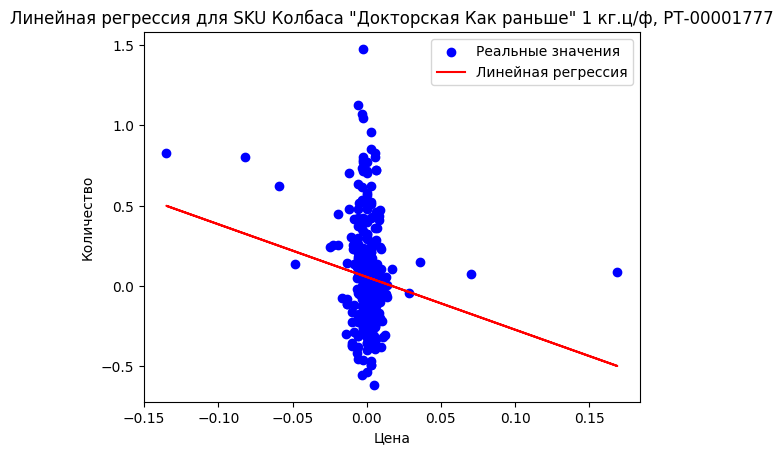

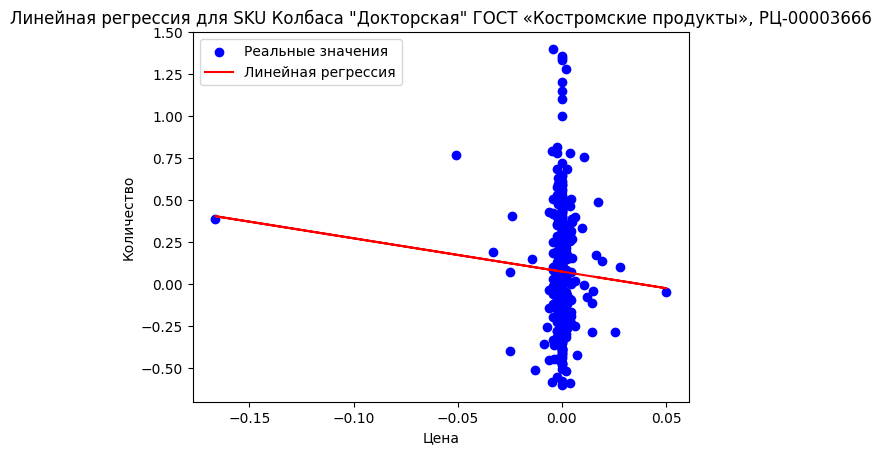

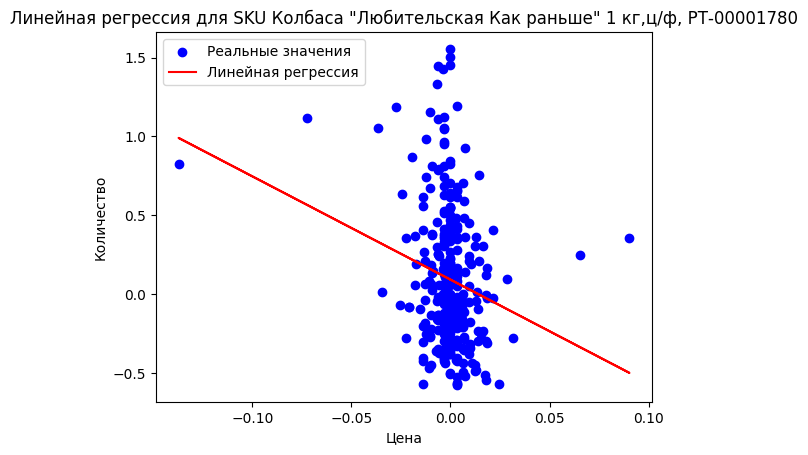

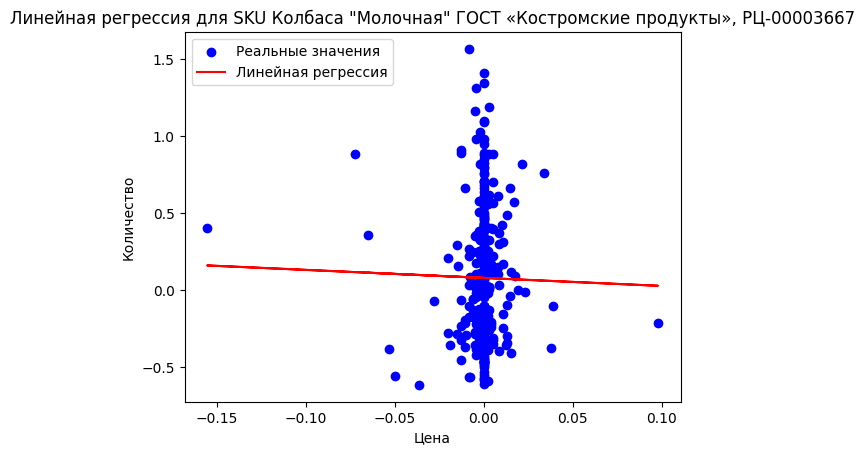

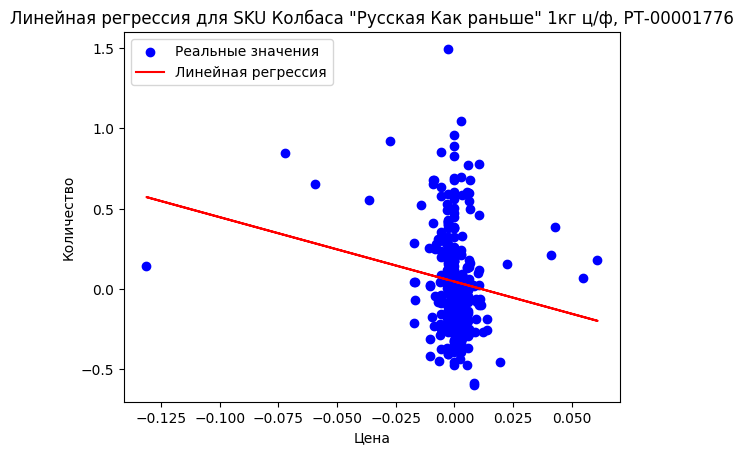

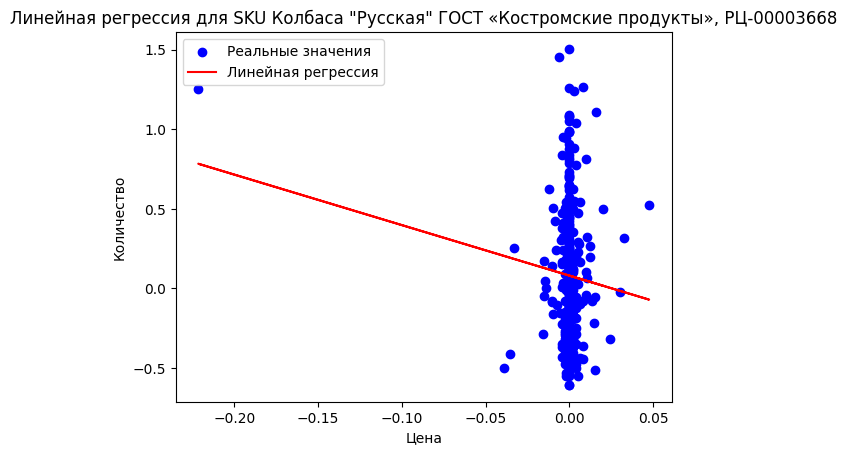

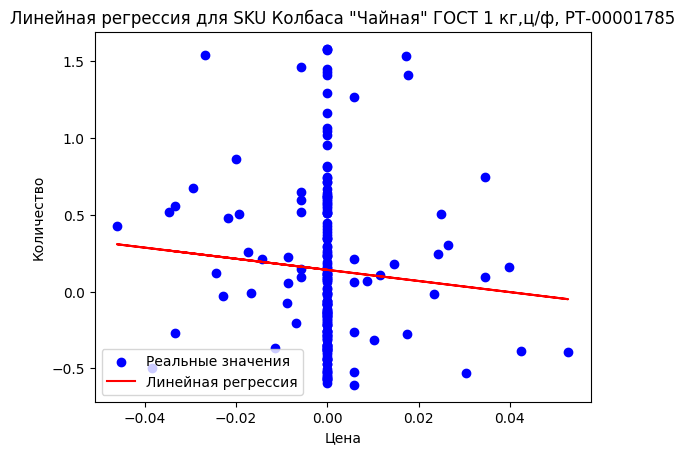

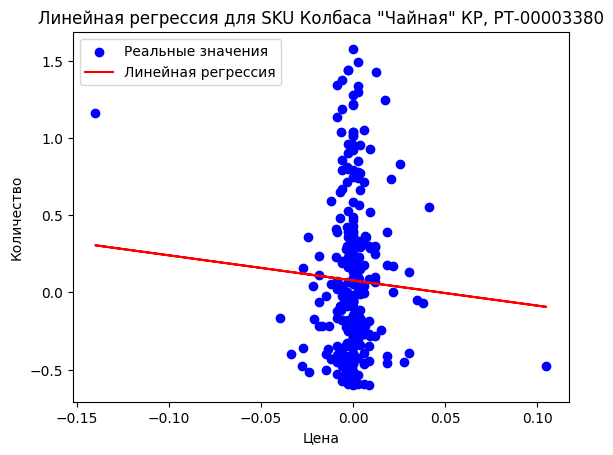

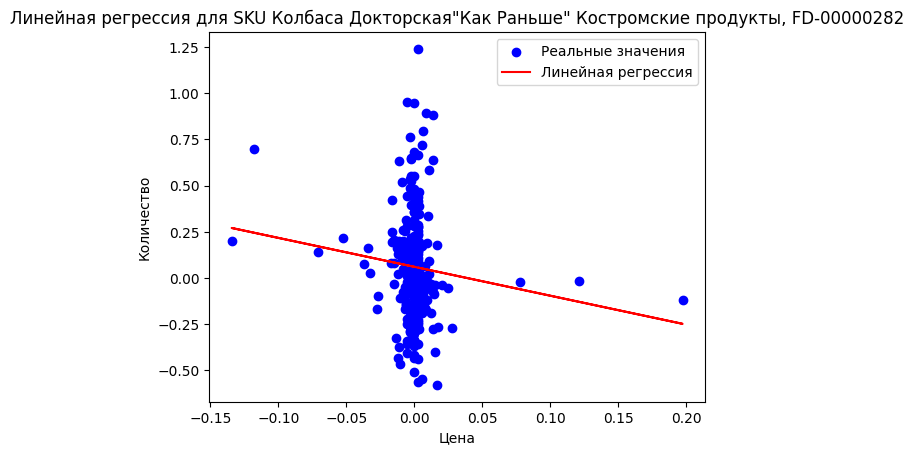

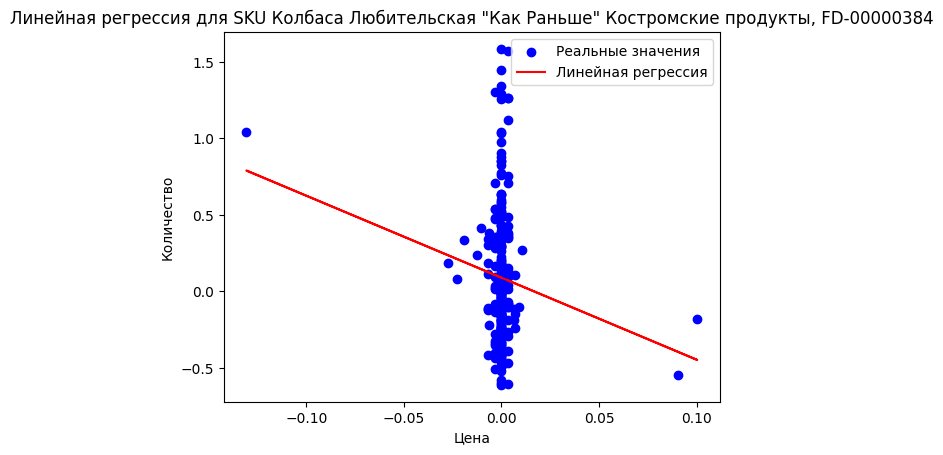

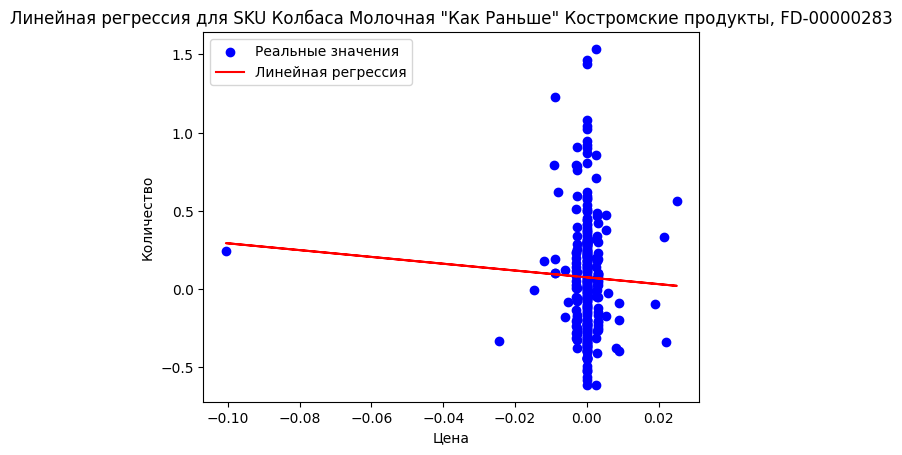

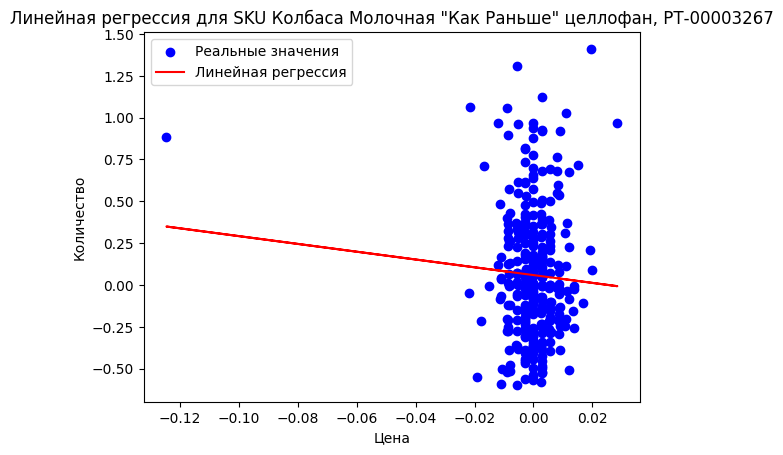

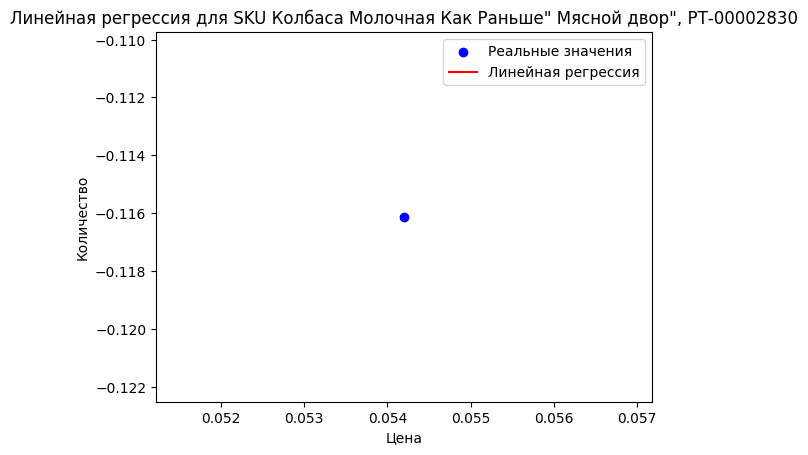

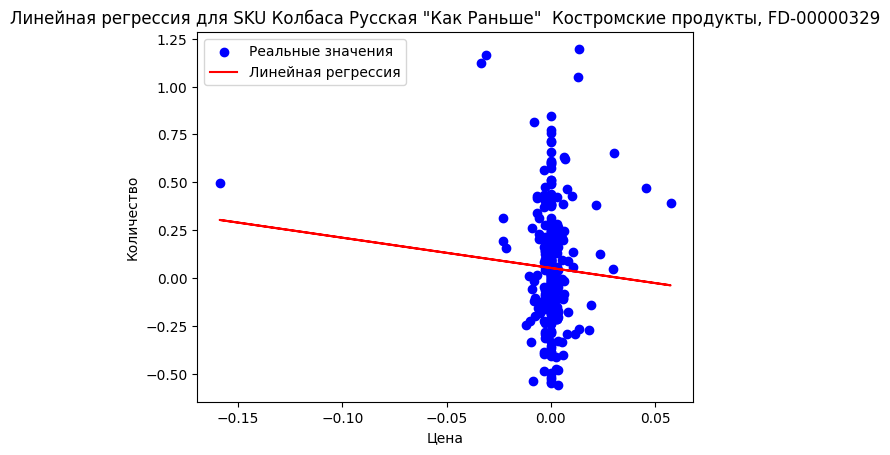

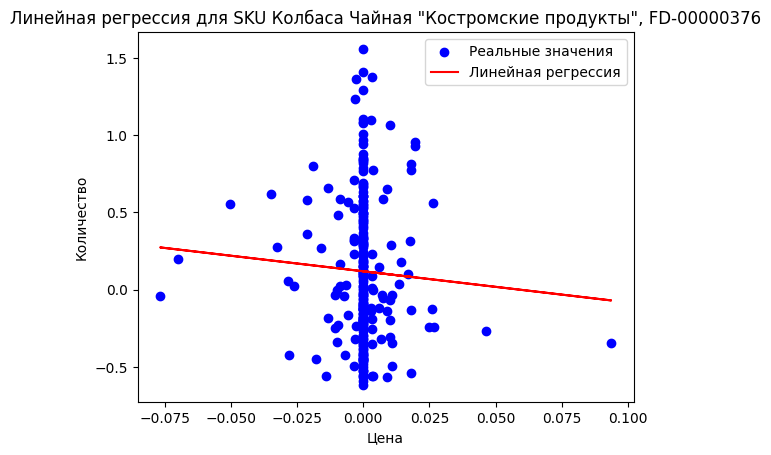

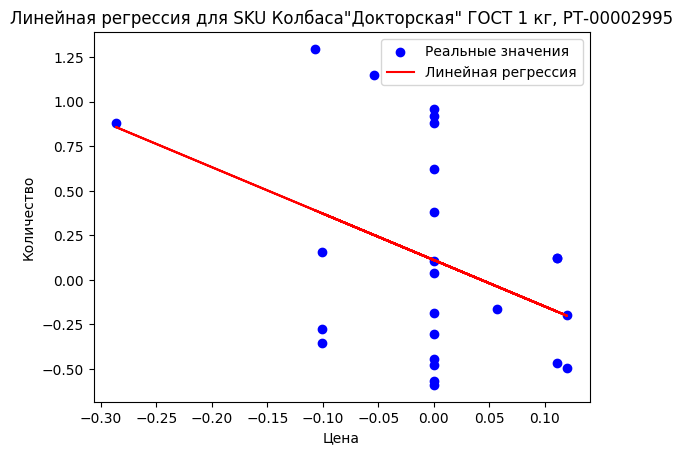

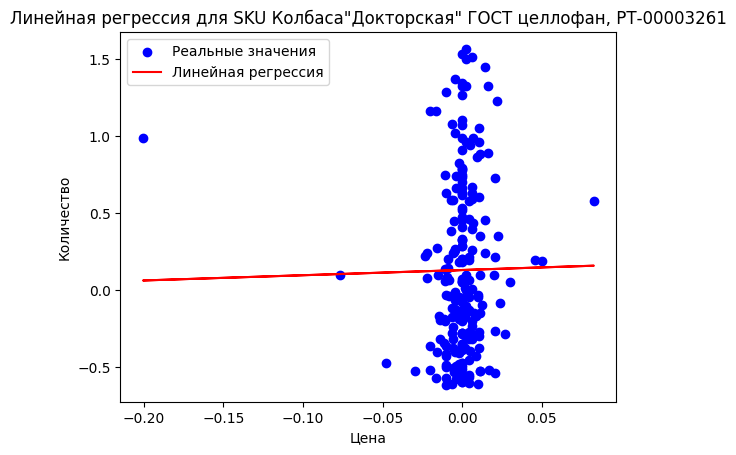

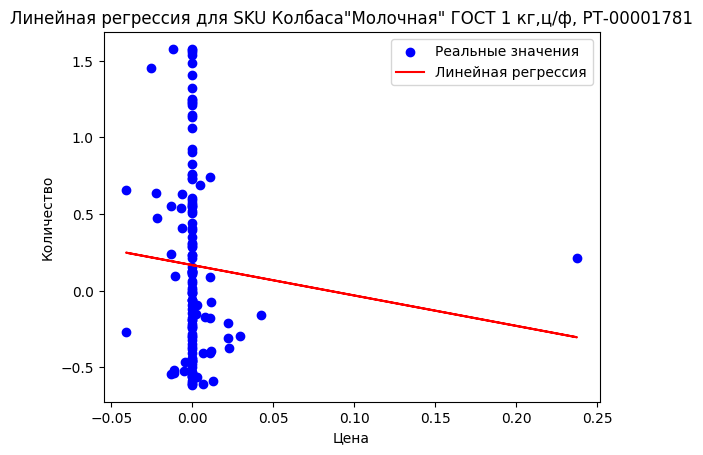

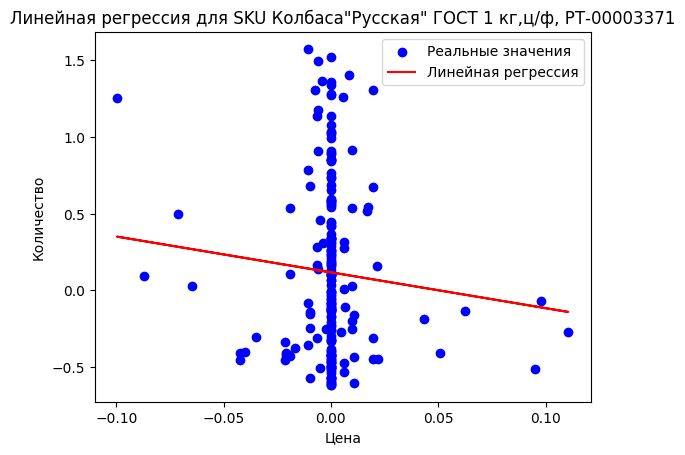

In [11]:
n = 20 # изменение цены (можно менять на другое значение)

# Создаем пустой датафрейм для сбора результатов
results = pd.DataFrame(columns=[
    'SKU, Код',
    'Коэффициент эластичности',
    'Коэффициент линейной регрессии',
    'Коэффициент корреляции',
    'alpha',
    'error',
    f'Изменение при увеличении на {n} руб.',
    f'Изменение при уменьшении на {n} руб.'
])

# Фильтруем столбец изменения продаж, оставляем значения, которые лежат в диапазоне от 5 до 95 перцинтеля
df = df[df['Изменение объема'].between(*np.percentile(df['Изменение объема'], [5, 95]))]

for sku in df['SKU, Код'].unique():
    subset = df[df['SKU, Код'] == sku]
    
    X = subset['Изменение цены'].values.reshape(-1, 1)
    y = subset['Изменение объема'].values

    # Регрессионный анализ
    reg = LinearRegression().fit(X, y)
    
    # Предсказания модели
    y_pred = reg.predict(X)
    
    # Коэффициент эластичности
    elasticity = reg.coef_[0]
    
    # const
    alpha = reg.intercept_

    # corel
    cor = df['Изменение объема'].corr(df['Изменение цены'])
    
    # Среднеквадратическая ошибка
    rmse = np.sqrt(mean_squared_error(y, y_pred))

    # Прогнозирование изменений в объеме продаж при изменении цены на n рублей
    increase_forecast = reg.predict(np.array([[np.mean(X) + n]]))[0] - np.mean(y)
    decrease_forecast = reg.predict(np.array([[np.mean(X) - n]]))[0] - np.mean(y)
    

    # Добавление результатов в датафрейм
    temp_df = pd.DataFrame([{
        'SKU, Код': sku,
        'Коэффициент эластичности': round(elasticity, 3),
        'Коэффициент линейной регрессии': round(reg.coef_[0], 3),
        'Коэффициент корреляции': round(cor, 3),
        'alpha': round(alpha, 3),
        'error': round(rmse, 3),
        f'Изменение при увеличении на {n} руб.':round(increase_forecast, 3),
        f'Изменение при уменьшении на {n} руб.': round(decrease_forecast, 3)
    }])
    
    results = pd.concat([results, temp_df], ignore_index=True)

    plt.scatter(X, y, color='blue', label='Реальные значения')  # реальные данные
    plt.plot(X, y_pred, color='red', label='Линейная регрессия')  # предсказанные данные
    plt.title(f'Линейная регрессия для SKU {sku}')
    plt.xlabel('Цена')
    plt.ylabel('Количество')
    plt.legend()
    plt.show()

In [12]:
display(results)

,"SKU, Код",Коэффициент эластичности,Коэффициент линейной регрессии,Коэффициент корреляции,alpha,error,Изменение при увеличении на 20 руб.,Изменение при уменьшении на 20 руб.
0,"Колбаса ""Докторская Как раньше"" 1 кг.ц/ф, РТ-0...",-3.281,-3.281,-0.09,0.056,0.326,-65.619,65.619
1,"Колбаса ""Докторская"" ГОСТ «Костромские продукт...",-1.983,-1.983,-0.09,0.075,0.365,-39.661,39.661
2,"Колбаса ""Любительская Как раньше"" 1 кг,ц/ф, РТ...",-6.556,-6.556,-0.09,0.091,0.428,-131.119,131.119
3,"Колбаса ""Молочная"" ГОСТ «Костромские продукты»...",-0.522,-0.522,-0.09,0.078,0.427,-10.443,10.443
4,"Колбаса ""Русская Как раньше"" 1кг ц/ф, РТ-00001776",-4.018,-4.018,-0.09,0.045,0.308,-80.356,80.356
5,"Колбаса ""Русская"" ГОСТ «Костромские продукты»,...",-3.172,-3.172,-0.09,0.080,0.416,-63.432,63.432
6,"Колбаса ""Чайная"" ГОСТ 1 кг,ц/ф, РТ-00001785",-3.615,-3.615,-0.09,0.142,0.530,-72.299,72.299
7,"Колбаса ""Чайная"" КР, РТ-00003380",-1.629,-1.629,-0.09,0.078,0.515,-32.578,32.578
8,"Колбаса Докторская""Как Раньше"" Костромские про...",-1.569,-1.569,-0.09,0.059,0.296,-31.373,31.373
9,"Колбаса Любительская ""Как Раньше"" Костромские ...",-5.359,-5.359,-0.09,0.088,0.437,-107.189,107.189
